In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# display plots in the notebook
%matplotlib inline
# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

import seaborn as sb
import pandas as pd
import numpy as np
from scipy import stats
import random

In [2]:
from cloud import *

In [3]:
np.random.seed(seed=0)

In [4]:
cloud = Cloud(num_leafs=48,
              num_hosts_per_leaf=48,
              max_vms_per_host=20,
              num_tenants=100,
              min_vms_per_tenant=10,
              max_vms_per_tenant=100,
              vm_dist='expon',
              num_groups=1000,
              min_group_size=5,
              group_size_dist='uniform',
              placement_dist='uniform')

In [5]:
cloud.network.host_to_leaf_map.describe()

count    2304.000000
mean       23.500000
std        13.856406
min         0.000000
25%        11.750000
50%        23.500000
75%        35.250000
max        47.000000
dtype: float64

In [6]:
cloud.tenants.vm_map.describe()

count    100.000000
mean      13.630000
std        4.225117
min       10.000000
25%       10.750000
50%       12.000000
75%       15.000000
max       30.000000
dtype: float64

In [7]:
cloud.tenants.group_map.describe()

count    100.000000
mean       9.600000
std        3.097735
min        7.000000
25%        7.750000
50%        8.000000
75%       11.000000
max       22.000000
dtype: float64

In [8]:
cloud.tenants.group_size_map[0].describe()

count     9.000000
mean      7.888889
std       2.147350
min       5.000000
25%       7.000000
50%       8.000000
75%      10.000000
max      11.000000
dtype: float64

In [9]:
# cloud.tenants.group_to_vm_map[0][0].describe()

In [10]:
cloud.placement.tenant_vm_to_host_map[0].describe()

count      13.000000
mean      871.923077
std       622.767809
min       141.000000
25%       509.000000
50%       755.000000
75%      1023.000000
max      2242.000000
dtype: float64

In [11]:
cloud.placement.tenant_vm_to_leaf_map[0].describe()

count    13.000000
mean     17.538462
std      13.061492
min       2.000000
25%      10.000000
50%      15.000000
75%      21.000000
max      46.000000
dtype: float64

In [16]:
# len(cloud.placement.tenant_group_to_leaf_map[0][7].unique())

In [17]:
# len(cloud.placement.tenant_group_to_leaf_map[0][7])

In [25]:
plot_data = pd.Series()
# total_groups = 0
for i in range(cloud.tenants.num_tenants):
    plot_data = plot_data.append(cloud.placement.tenant_group_to_leaf_count[i], ignore_index=True)
#     total_groups += cloud.tenants.group_map[i]

plot_data.describe()

count    960.000000
mean       6.625000
std        2.523921
min        2.000000
25%        5.000000
50%        6.000000
75%        8.000000
max       18.000000
dtype: float64

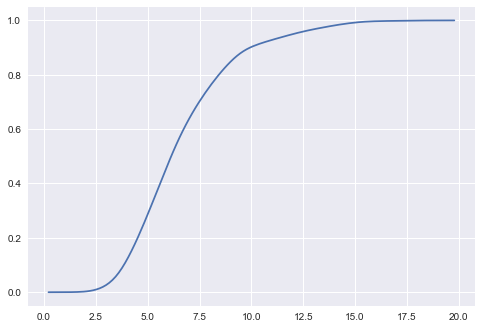

In [24]:
sb.kdeplot(plot_data, cumulative=True)